# Topic Modeling without Prior

## Overview

Topic modeling without prior is a crucial step in understanding the underlying topics in a corpus of text without any preconceived notions or biases. In the context of this research, the Latent Dirichlet Allocation (LDA) model is used to uncover the hidden thematic structure in the Cambodian news articles.

## Configuration Details

### Model Type and Parameters

The model used is LDA, with the following hyperparameters:

- **Number of Topics (k):** 20
- **Alpha:** 0.1
- **Eta:** 0.01

These hyperparameters control the distribution of topics over documents (Alpha) and the distribution of words over topics (Eta).

### Corpus Configuration

The corpus is configured to include n-grams up to a maximum length of 3, with a minimum frequency of 20 and a minimum document frequency of 10. The text column used for modeling is 'adjnouns', focusing on adjectives and nouns.

### Word Cloud Visualization

The configuration also includes settings for generating word cloud visualizations for the topics. The word clouds are configured with the following properties:

- **Background Color:** Black
- **Colormap:** PuBu
- **Width:** 400
- **Height:** 200

### Batch Configuration

The batch configuration controls the execution environment, including the device (CPU), number of devices, and number of workers. It also specifies the paths for the configuration files and the output directory.

## Execution Workflow

1. **Load Dataset:** The dataset is loaded from the specified Parquet file containing the tokenized text.
2. **Train LDA Model:** The LDA model is trained on the corpus using the specified hyperparameters.
3. **Evaluate Coherence:** The coherence of the topics is evaluated using metrics such as U-Mass, C-UCI, C-NPMI, and C-V.
4. **Generate Word Clouds:** Word clouds are generated for the top words in each topic, providing a visual representation of the topics.
5. **Inference (Optional):** The model can be used to infer topics on new or unseen data.

## Running the Workflow

The entire workflow can be executed using the following command:

```bash
!nbcpu +workflow=nbcpu tasks='[nbcpu-topic_noprior]' mode=__info__
```


In [17]:
!nbcpu +workflow=nbcpu tasks='[nbcpu-topic_noprior]' mode=__info__

[2023-08-15 17:05:23,109][hyfi.joblib.joblib][INFO] - initialized batcher with <hyfi.joblib.batch.batcher.Batcher object at 0x7f19e0456880>
[2023-08-15 17:05:23,110][hyfi.main.config][INFO] - HyFi project [nbcpu] initialized
[2023-08-15 17:05:23,298][hyfi.main.main][INFO] - The HyFI config is not instantiatable, running HyFI task with the config
[2023-08-15 17:05:24,126][hyfi.joblib.joblib][INFO] - initialized batcher with <hyfi.joblib.batch.batcher.Batcher object at 0x7f19e0065c10>
[2023-08-15 17:05:25,269][hyfi.task.batch][INFO] - Initalized batch: corpus(1) in /home/yjlee/workspace/projects/nbcpu/workspace/topic/corpus
[2023-08-15 17:05:26,715][hyfi.task.batch][INFO] - Initalized batch: corpus(1) in /home/yjlee/workspace/projects/nbcpu/workspace/topic/corpus
[2023-08-15 17:05:26,716][hyfi.task.batch][INFO] - Initalized batch: model(0) in /home/yjlee/workspace/projects/nbcpu/workspace/topic/model
[2023-08-15 17:05:27,425][hyfi.task.batch][INFO] - Initalized batch: corpus(1) in /home/

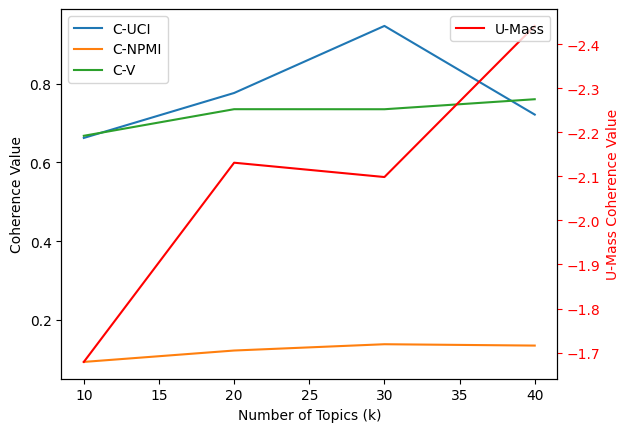

In [16]:
import matplotlib.pyplot as plt
import json

k_values = []
u_mass = []
c_uci = []
c_npmi = []
c_v = []

with open("figs/model-summary.jsonl", "r") as file:
    for line in file:
        obj = json.loads(line)
        k_values.append(obj["model_args"]["k"])
        u_mass.append(obj["coherence"]["u_mass"])
        c_uci.append(obj["coherence"]["c_uci"])
        c_npmi.append(obj["coherence"]["c_npmi"])
        c_v.append(obj["coherence"]["c_v"])


fig, ax1 = plt.subplots()

ax1.plot(k_values, c_uci, label="C-UCI")
ax1.plot(k_values, c_npmi, label="C-NPMI")
ax1.plot(k_values, c_v, label="C-V")
ax1.set_xlabel("Number of Topics (k)")
ax1.set_ylabel("Coherence Value")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.plot(k_values, u_mass, label="U-Mass", color="red")
ax2.set_ylabel("U-Mass Coherence Value", color="red")
ax2.invert_yaxis()  # Invert the y-axis for U-Mass
ax2.tick_params(axis="y", colors="red")
ax2.legend(loc="upper right")

plt.show()


## Coherence Values and Selection of k

The selection of the optimal number of topics (k) is a critical step in topic modeling, especially in Latent Dirichlet Allocation (LDA). This process involves evaluating the coherence of the topics generated for different values of k and selecting the one that maximizes coherence. In this analysis, we examine four different models with k values of 10, 20, 30, and 40. We evaluate the coherence using four different metrics: U-Mass, C-UCI, C-NPMI, and C-V. The results are plotted to visually assess the optimal k value.

The following table summarizes the coherence values for each model:

| k   | U-Mass  | C-UCI  | C-NPMI | C-V    |
| --- | ------- | ------ | ------ | ------ |
| 10  | -1.6788 | 0.6621 | 0.0936 | 0.6675 |
| 20  | -2.1309 | 0.7761 | 0.1226 | 0.7350 |
| 30  | -2.0985 | 0.9463 | 0.1385 | 0.7349 |
| 40  | -2.4415 | 0.7213 | 0.1351 | 0.7603 |

### Selecting the Appropriate k

Based on the plot and the coherence values, the optimal k can be selected. Generally, the value of k that maximizes the coherence value is considered optimal. However, the choice might vary depending on the specific coherence metric used and the interpretability of the topics.

The selection of k is a nuanced process that depends on both quantitative metrics and qualitative assessment. While coherence values provide a quantitative measure, the interpretability and relevance of the topics should also be considered. It might be beneficial to examine the actual topics generated for the selected k and assess their relevance to the domain of interest.

Here, we select k = 20 as the optimal number of topics. The topics generated for this model are examined in the next section.


## Model Results

The Latent Dirichlet Allocation (LDA) model was applied to a corpus of 39,637 documents, resulting in the identification of 20 distinct topics. The model's coherence scores and detailed topic-word distributions provide insights into the underlying themes within the corpus.

1. **Topics Identification**: The 20 topics identified represent distinct themes within the corpus. For example:

   - **Topic 0**: Focused on political themes, indicating a substantial portion of the corpus may be related to political discourse.
   - **Topic 1**: Centered on health and the COVID-19 pandemic, reflecting the global relevance of health issues.

2. **Document-Topic Distributions**: The distribution of topics within documents provides a granular view of the corpus's thematic structure. This can be valuable for content categorization, recommendation systems, or understanding the evolution of themes over time.

3. **Visualizations**: The word cloud collages offer a visual representation of the topics, aiding in the intuitive understanding of the main themes. This can be particularly useful for communicating results to non-technical stakeholders.


The following figure shows the wordcloud of the top 500 words in each topic from the LDA model with 20 topics. The size of the word is proportional to the frequency of the word in the topic.

```{figure} ./figs/LDA_model(1)_k(20)_wordcloud_00.png
---
scale: 90%
name: fig-lda-wordcloud-noprior
---
Wordcloud of the top 500 words in each topic from the LDA model with 20 topics. The size of the word is proportional to the frequency of the word in the topic.
```


![](<./figs/LDA_model(1)_k(20)_wordcloud_00.png>)
